---

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

---


# Raisin Class Prediction




<p style="text-align: center;"><img src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fsodelicious.recipes%2Fwp-content%2Fuploads%2F2018%2F08%2Ftypes-of-raisins-e1533733537634.jpg&f=1&nofb=1&ipt=eb296d67436cbdad96a1ebdcd6a88335205e740ed17da65337258d46f67b6390&ipo=images" class="img-fluid" alt="CLRSWY" width="600" height="400"></p>

Data Set Information:

Images of Kecimen and Besni raisin varieties grown in Turkey were obtained with CVS. A total of 900 raisin grains were used, including 450 pieces from both varieties. These images were subjected to various stages of pre-processing and 7 morphological features were extracted. These features have been classified using three different artificial intelligence techniques.

Attribute Information:

1. Area: Gives the number of pixels within the boundaries of the raisin.
2. Perimeter: It measures the environment by calculating the distance between the boundaries of the raisin and the pixels around it.
3. MajorAxisLength: Gives the length of the main axis, which is the longest line that can be drawn on the raisin.
4. MinorAxisLength: Gives the length of the small axis, which is the shortest line that can be drawn on the raisin.
5. Eccentricity: It gives a measure of the eccentricity of the ellipse, which has the same moments as raisins.
6. ConvexArea: Gives the number of pixels of the smallest convex shell of the region formed by the raisin.
7. Extent: Gives the ratio of the region formed by the raisin to the total pixels in the bounding box.
8. Class: Kecimen and Besni raisin.

https://archive.ics.uci.edu/dataset/850/raisin


# Import libraries


In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.metrics import  RocCurveDisplay, PrecisionRecallDisplay
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore') #switching warnings off since they are a bit annoying :)

%matplotlib inline

## Exploratory Data Analysis and Visualization


In [3]:
# reading the dataset
df = pd.read_excel('Raisin_Dataset.xlsx')
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


In [4]:
# checking for nulls
df.isnull().sum()

Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64

In [5]:
# checking for duplicates
df.duplicated().sum()

0

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Area,900.0,87804.127778,39002.111390,25387.000000,59348.000000,78902.000000,105028.250000,235047.000000
MajorAxisLength,900.0,430.929950,116.035121,225.629541,345.442898,407.803951,494.187014,997.291941
MinorAxisLength,900.0,254.488133,49.988902,143.710872,219.111126,247.848409,279.888575,492.275279
Eccentricity,900.0,0.781542,0.090318,0.348730,0.741766,0.798846,0.842571,0.962124
ConvexArea,900.0,91186.090000,40769.290132,26139.000000,61513.250000,81651.000000,108375.750000,278217.000000
Extent,900.0,0.699508,0.053468,0.379856,0.670869,0.707367,0.734991,0.835455
Perimeter,900.0,1165.906636,273.764315,619.074000,966.410750,1119.509000,1308.389750,2697.753000


In [7]:
df['Class'].value_counts()

Kecimen    450
Besni      450
Name: Class, dtype: int64

The classes are balanced

## EDA


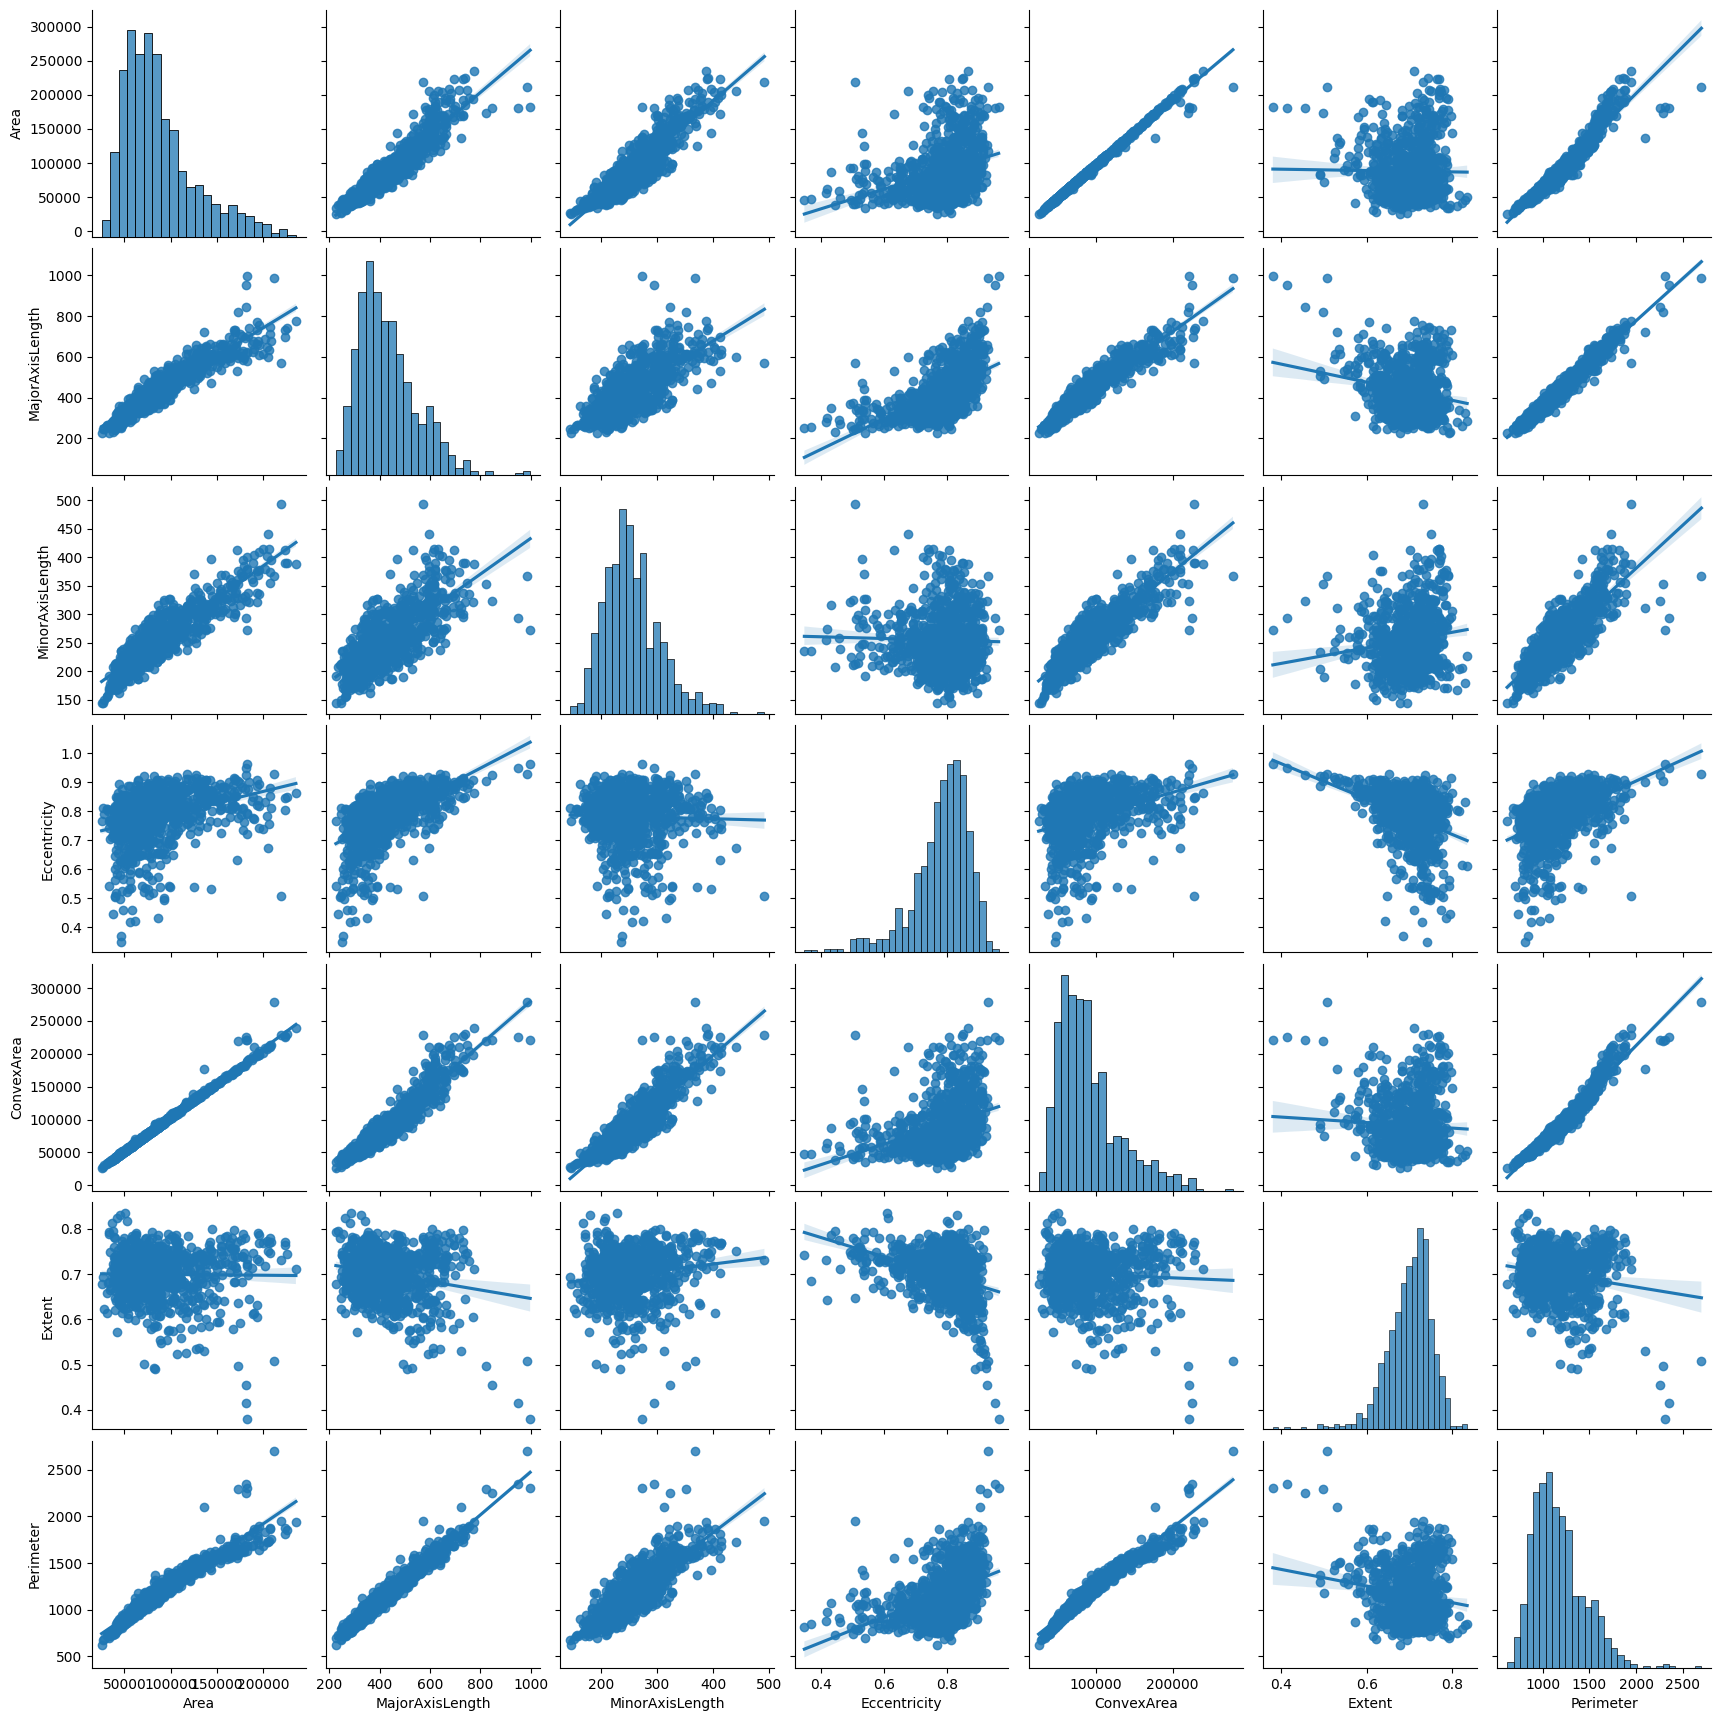

In [11]:
# visualize numerical values
sns.pairplot(df, kind='reg')

<Axes: >

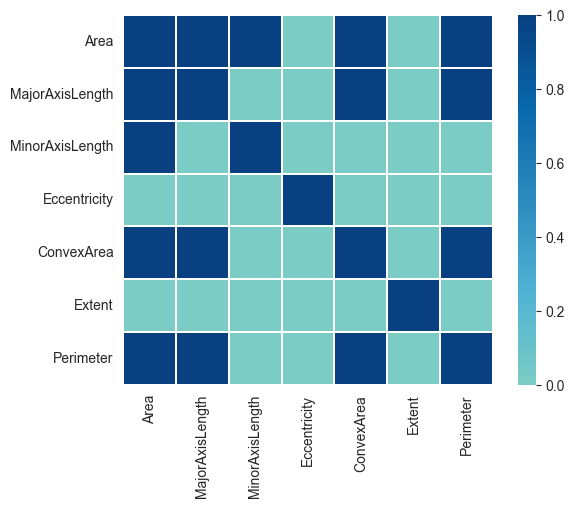

In [7]:
# visualize correlation
sns.heatmap(df.corr(numeric_only=True) > .9,
            cmap='GnBu',
            linewidths=.12,
            linecolor='white',
            fmt='.2g',
            center=0,
            square=True)

## Train | Test Split and Scaling

- for train_test_split use fallowing arguments:
  - train_size: 0.2
  - stratify: True
  - random_state: 10
- Use StandardScaler to scale the data.


In [22]:
# encoding the target variable
label_encoder = LabelEncoder()
df['Class'] = label_encoder.fit_transform(df['Class'])

In [23]:
# splitting X and y
X = df.drop(columns=['Class'])
y = df['Class']

In [25]:
# default splitting
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=10)

In [26]:
y_train.value_counts()

0    367
1    353
Name: Class, dtype: int64

unbalanced number of classes

In [19]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, stratify=True, random_state=10)

TypeError: Singleton array array(True) cannot be considered a valid collection.

In [27]:
# set stratify to y, True doesn't work anymore
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, stratify=y, random_state=10)

In [28]:
y_train.value_counts()

0    360
1    360
Name: Class, dtype: int64

# Logistic Regression

- Train the model using the training set with the default parameters.


In [70]:
# Linear regression model
lr = LogisticRegression()

lr_pipe = make_pipeline(StandardScaler(), lr)

lr_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

## Model Performance

\*Check the accuracy of the model using the train and test set by given eval_metric function.


In [34]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    """ to get the metrics for the model """

    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))
    print()
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))


In [71]:
eval_metric(lr_pipe, X_train, y_train, X_test, y_test)

Train_Set
[[307  53]
 [ 36 324]]
              precision    recall  f1-score   support

           0       0.90      0.85      0.87       360
           1       0.86      0.90      0.88       360

    accuracy                           0.88       720
   macro avg       0.88      0.88      0.88       720
weighted avg       0.88      0.88      0.88       720


Test_Set
[[75 15]
 [14 76]]
              precision    recall  f1-score   support

           0       0.84      0.83      0.84        90
           1       0.84      0.84      0.84        90

    accuracy                           0.84       180
   macro avg       0.84      0.84      0.84       180
weighted avg       0.84      0.84      0.84       180



### Cross Validate

- Use the cross_val_score function to evaluate the model using the train set.


In [72]:
scores = cross_validate(lr_pipe,
                        X_train,
                        y_train,
                        scoring=['accuracy', 'precision','recall','f1'],
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.877778
train_accuracy     0.876698
test_precision     0.862529
train_precision    0.857393
test_recall        0.902778
train_recall       0.903704
test_f1            0.880419
train_f1           0.879934
dtype: float64

### GridSearchCV

- Use the GridSearchCV function to find the best parameters for the model.


In [38]:
lr_pipe.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('logisticregression', LogisticRegression())],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'logisticregression': LogisticRegression(),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'logisticregression__C': 1.0,
 'logisticregression__class_weight': None,
 'logisticregression__dual': False,
 'logisticregression__fit_intercept': True,
 'logisticregression__intercept_scaling': 1,
 'logisticregression__l1_ratio': None,
 'logisticregression__max_iter': 100,
 'logisticregression__multi_class': 'auto',
 'logisticregression__n_jobs': None,
 'logisticregression__penalty': 'l2',
 'logisticregression__random_state': None,
 'logisticregression__solver': 'lbfgs',
 'logisticregression__tol': 0.0001,
 'logisticregression__verbose': 0,
 'logisticregression__warm_start': False}

In [77]:
param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100],
              'logisticregression__max_iter': [100, 200, 300],
              'logisticregression__penalty': ['l1', 'l2'],
              'logisticregression__solver': ['lbfgs', 'liblinear', 'saga']}

In [100]:
lr_model_grid = GridSearchCV(lr_pipe,
                              param_grid,
                              scoring="recall",
                              cv=10,
                              return_train_score=True)
lr_model_grid.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('logisticregression',
                                        LogisticRegression())]),
             param_grid={'logisticregression__C': [0.001, 0.01, 0.1, 1, 10,
                                                   100],
                         'logisticregression__max_iter': [100, 200, 300],
                         'logisticregression__penalty': ['l1', 'l2'],
                         'logisticregression__solver': ['lbfgs', 'liblinear',
                                                        'saga']},
             return_train_score=True, scoring='recall')

In [101]:
lr_model_grid.best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.01, penalty='l1', solver='liblinear'))])

In [102]:
lr2 = LogisticRegression(C=0.01, penalty='l1', solver='liblinear')

lr_pipe2 = make_pipeline(StandardScaler(), lr2)

lr_pipe2.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.01, penalty='l1', solver='liblinear'))])

In [103]:
scores = cross_validate(lr_pipe2,
                        X_train,
                        y_train,
                        scoring=['accuracy', 'precision','recall','f1'],
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.852778
train_accuracy     0.856173
test_precision     0.803784
train_precision    0.805481
test_recall        0.938889
train_recall       0.939198
test_f1            0.864915
train_f1           0.867204
dtype: float64

## ROC (Receiver Operating Curve) and AUC (Area Under Curve)

- Use the roc_curve function to calculate the ROC curve and compare logistic regression models with default and tuned parameters.


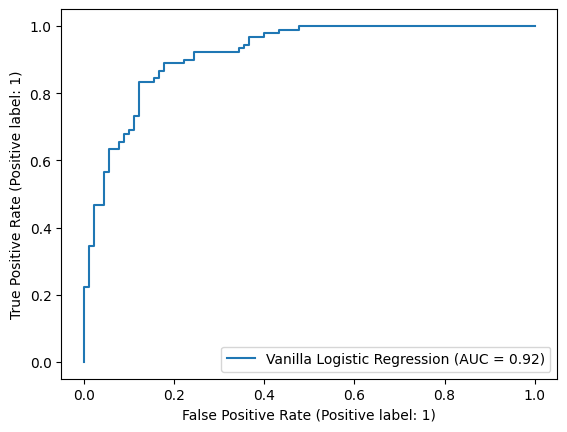

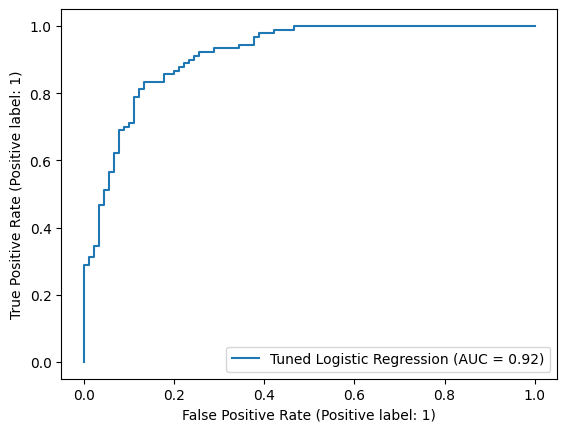

In [104]:
RocCurveDisplay.from_estimator(lr_pipe, X_test, y_test, name='Vanilla Logistic Regression')
RocCurveDisplay.from_estimator(lr_pipe2, X_test, y_test, name='Tuned Logistic Regression');

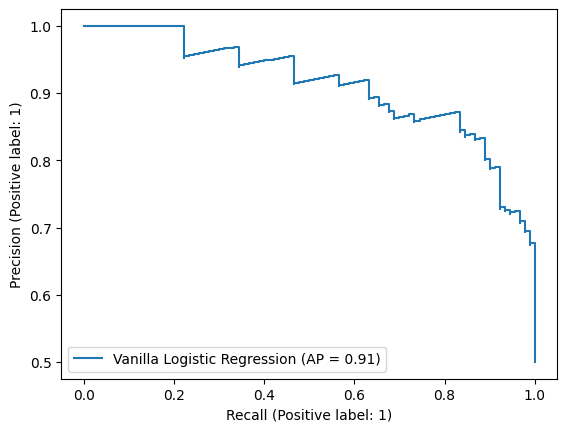

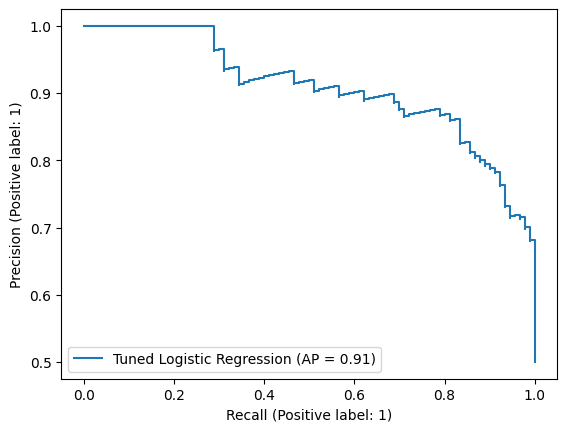

In [105]:
PrecisionRecallDisplay.from_estimator(lr_pipe, X_test, y_test, name='Vanilla Logistic Regression')
PrecisionRecallDisplay.from_estimator(lr_pipe2, X_test, y_test, name='Tuned Logistic Regression');

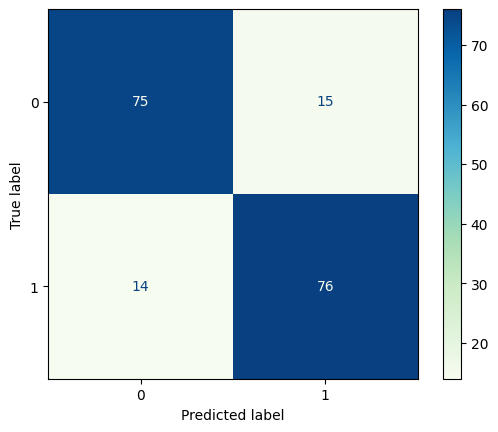

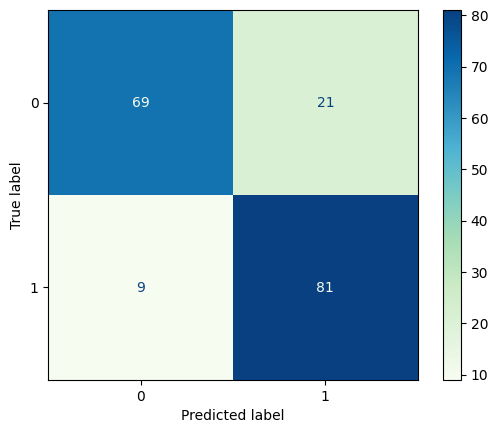

In [108]:
ConfusionMatrixDisplay.from_estimator(lr_pipe,X_test, y_test, cmap='GnBu')
ConfusionMatrixDisplay.from_estimator(lr_pipe2,X_test, y_test, cmap='GnBu');

## KNN (K-Nearest Neighbors)

- Train the model using the training set with the default parameters.


In [159]:
# knn model
knn = KNeighborsClassifier()

knn_pipe = make_pipeline(StandardScaler(), knn)

knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [160]:
eval_metric(knn_pipe, X_train, y_train, X_test, y_test)

Train_Set
[[310  50]
 [ 27 333]]
              precision    recall  f1-score   support

           0       0.92      0.86      0.89       360
           1       0.87      0.93      0.90       360

    accuracy                           0.89       720
   macro avg       0.89      0.89      0.89       720
weighted avg       0.89      0.89      0.89       720


Test_Set
[[70 20]
 [13 77]]
              precision    recall  f1-score   support

           0       0.84      0.78      0.81        90
           1       0.79      0.86      0.82        90

    accuracy                           0.82       180
   macro avg       0.82      0.82      0.82       180
weighted avg       0.82      0.82      0.82       180



### Elbow Method for Choosing Reasonable K Values

- Use the elbow method to find the optimal number of neighbors.


In [129]:
# code from KNN lab session 

test_error_rates = []


for k in range(1, 30):

    knn = KNeighborsClassifier(n_neighbors=k)

    knn_pipe = make_pipeline(StandardScaler(), knn)

    knn_pipe.fit(X_train, y_train)

    scores = cross_validate(knn_pipe, X_train, y_train, scoring = ['accuracy'], cv = 10)

    accuracy_mean = scores["test_accuracy"].mean()

    test_error = 1 - accuracy_mean

    test_error_rates.append(test_error)

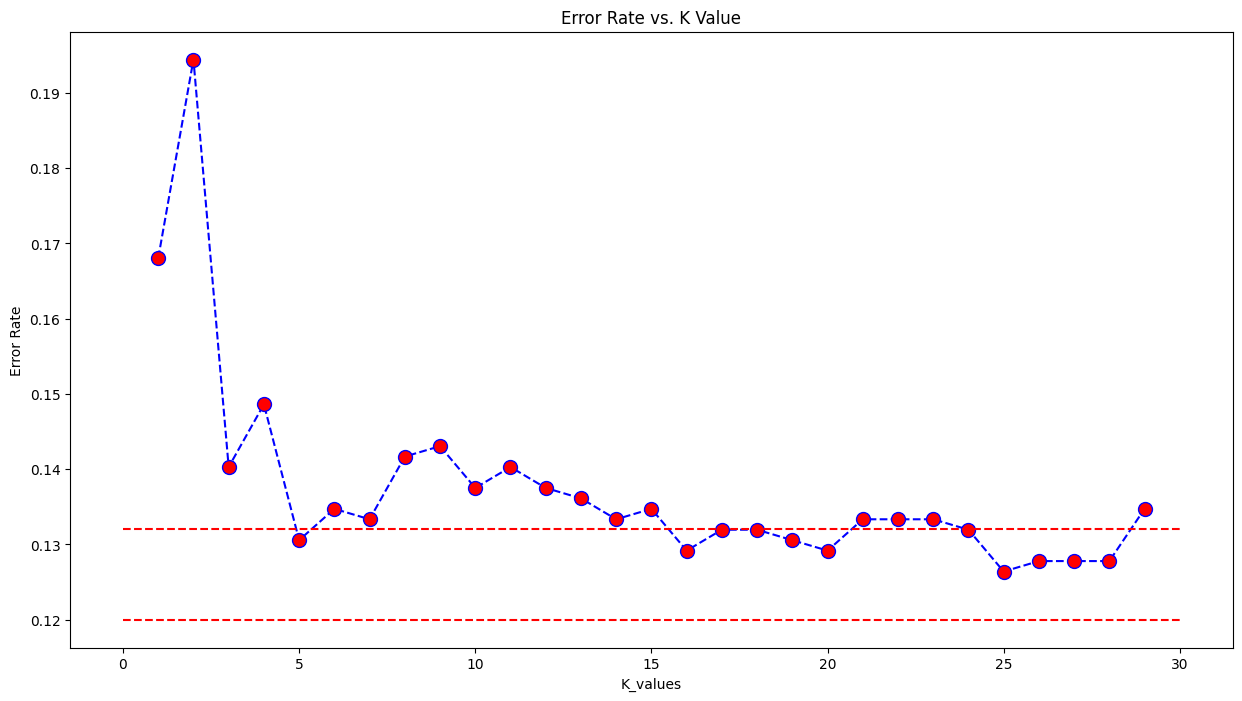

In [145]:
plt.figure(figsize=(15,8))
plt.plot(range(1,30), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')
plt.hlines(y=0.132, xmin=0, xmax=30, colors='r', linestyles="--")
plt.hlines(y=0.120, xmin=0, xmax=30, colors='r', linestyles="--");

### Scores by Various K Values

- Select some k values smaller and bigger than the optimal k value to see how the model performs.


In [152]:
knn = KNeighborsClassifier(n_neighbors=2)

knn_pipe = make_pipeline(StandardScaler(), knn)

knn_pipe.fit(X_train, y_train)

eval_metric(knn_pipe, X_train, y_train, X_test, y_test)

Train_Set
[[360   0]
 [ 58 302]]
              precision    recall  f1-score   support

           0       0.86      1.00      0.93       360
           1       1.00      0.84      0.91       360

    accuracy                           0.92       720
   macro avg       0.93      0.92      0.92       720
weighted avg       0.93      0.92      0.92       720


Test_Set
[[77 13]
 [20 70]]
              precision    recall  f1-score   support

           0       0.79      0.86      0.82        90
           1       0.84      0.78      0.81        90

    accuracy                           0.82       180
   macro avg       0.82      0.82      0.82       180
weighted avg       0.82      0.82      0.82       180



### Cross Validate

- Use the cross_val_score function to evaluate the model using the train set. Use optimal k value which you found in the elbow method.


In [154]:
knn = KNeighborsClassifier(n_neighbors=5)

knn_pipe = make_pipeline(StandardScaler(), knn)

knn_pipe.fit(X_train, y_train)

scores = cross_validate(knn_pipe,
                        X_train,
                        y_train,
                        scoring=['accuracy', 'precision','recall','f1'],
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.869444
train_accuracy     0.893519
test_precision     0.844542
train_precision    0.868323
test_recall        0.908333
train_recall       0.927778
test_f1            0.874528
train_f1           0.897039
dtype: float64

### Gridsearch Method for Choosing Reasonable K Values

- Use the GridSearchCV function to find the best parameters for the model. this method is brute force method to find the best parameters, and it takes a long time to run for KNN. You will get different k values because of you will use different parameters, and also gridsearch method tries to find minimum error. Sometimes it get larger k values for optimal but for sake of reduce complexity we use the elbow method to find the optimal k value.


In [134]:
knn_pipe.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=29))],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'kneighborsclassifier': KNeighborsClassifier(n_neighbors=29),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'kneighborsclassifier__algorithm': 'auto',
 'kneighborsclassifier__leaf_size': 30,
 'kneighborsclassifier__metric': 'minkowski',
 'kneighborsclassifier__metric_params': None,
 'kneighborsclassifier__n_jobs': None,
 'kneighborsclassifier__n_neighbors': 29,
 'kneighborsclassifier__p': 2,
 'kneighborsclassifier__weights': 'uniform'}

In [147]:
# In binary classification, choose k as an odd number to avoid ties.
k_values= range(1,30,2)

In [148]:
param_grid = {'kneighborsclassifier__n_neighbors':k_values, 
              'kneighborsclassifier__metric': ['euclidean', 'manhattan','chebyshev','minkowski','mahalanobis'],
              'kneighborsclassifier__p': [1,2],
              'kneighborsclassifier__weights': ['uniform', 'distance']}

In [150]:
knn_model_grid = GridSearchCV(knn_pipe,
                              param_grid,
                              scoring="accuracy",
                              cv=10,
                              return_train_score=True)
knn_model_grid.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             param_grid={'kneighborsclassifier__metric': ['euclidean',
                                                          'manhattan',
                                                          'chebyshev',
                                                          'minkowski',
                                                          'mahalanobis'],
                         'kneighborsclassifier__n_neighbors': range(1, 30, 2),
                         'kneighborsclassifier__p': [1, 2],
                         'kneighborsclassifier__weights': ['uniform',
                                                           'distance']},
             return_train_score=True, scoring='accuracy')

In [151]:
knn_model_grid.best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier',
                 KNeighborsClassifier(metric='manhattan', p=1,
                                      weights='distance'))])

In [157]:
knn = KNeighborsClassifier(metric='manhattan', p=1, weights='distance')

tuned_knn_pipe = make_pipeline(StandardScaler(), knn)

tuned_knn_pipe.fit(X_train, y_train)

eval_metric(tuned_knn_pipe, X_train, y_train, X_test, y_test)

Train_Set
[[360   0]
 [  0 360]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       360
           1       1.00      1.00      1.00       360

    accuracy                           1.00       720
   macro avg       1.00      1.00      1.00       720
weighted avg       1.00      1.00      1.00       720


Test_Set
[[71 19]
 [14 76]]
              precision    recall  f1-score   support

           0       0.84      0.79      0.81        90
           1       0.80      0.84      0.82        90

    accuracy                           0.82       180
   macro avg       0.82      0.82      0.82       180
weighted avg       0.82      0.82      0.82       180



In [158]:
scores = cross_validate(tuned_knn_pipe,
                        X_train,
                        y_train,
                        scoring=['accuracy', 'precision','recall','f1'],
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.876389
train_accuracy     1.000000
test_precision     0.851890
train_precision    1.000000
test_recall        0.913889
train_recall       1.000000
test_f1            0.881179
train_f1           1.000000
dtype: float64

### Evaluating ROC Curves and AUC

\*Use the roc_curve function to calculate the ROC curve and compare KNN models with default and tuned parameters.


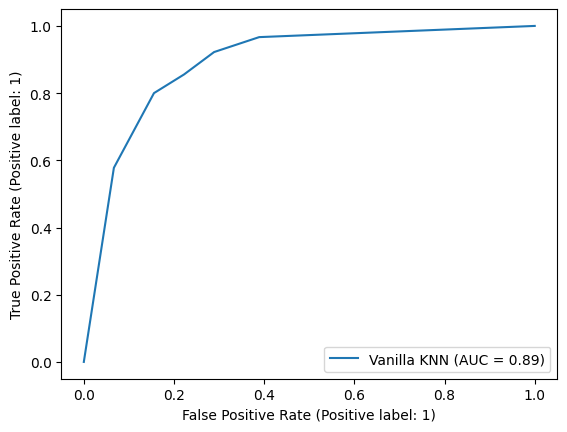

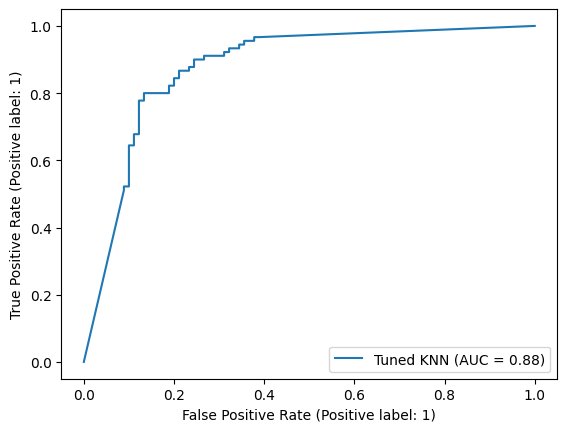

In [161]:
RocCurveDisplay.from_estimator(knn_pipe, X_test, y_test, name='Vanilla KNN')
RocCurveDisplay.from_estimator(tuned_knn_pipe, X_test, y_test, name='Tuned KNN');

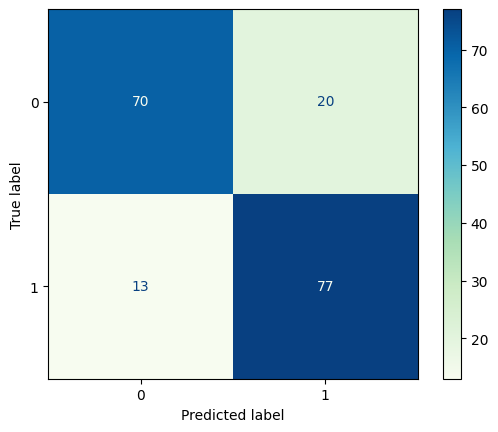

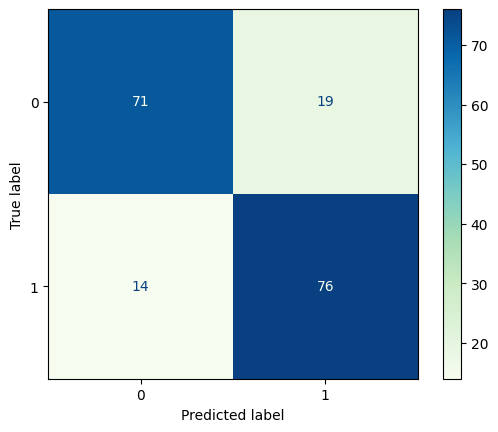

In [162]:
ConfusionMatrixDisplay.from_estimator(knn_pipe,X_test, y_test, cmap='GnBu')
ConfusionMatrixDisplay.from_estimator(tuned_knn_pipe,X_test, y_test, cmap='GnBu');

# Conclusion

- Write a short summary of your findings, and decide which model you will use and why.


- The Vanilla Logistic Regression Model Showed the highest AUC score (0.91)
- The Vanilla KNN model showed higher AUC score but lower accuracy score compared to the tuned one
- The Vanilla Logistic Regression model and tuned KNN has the same accuracy scores (0.87)
- The tuning process did not improve the models that much 
<br> Therefore, the Vanilla Logistic will be our choice, in addition, it's more robust compared to KNN.

---

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

---
